# Imports

# Functions

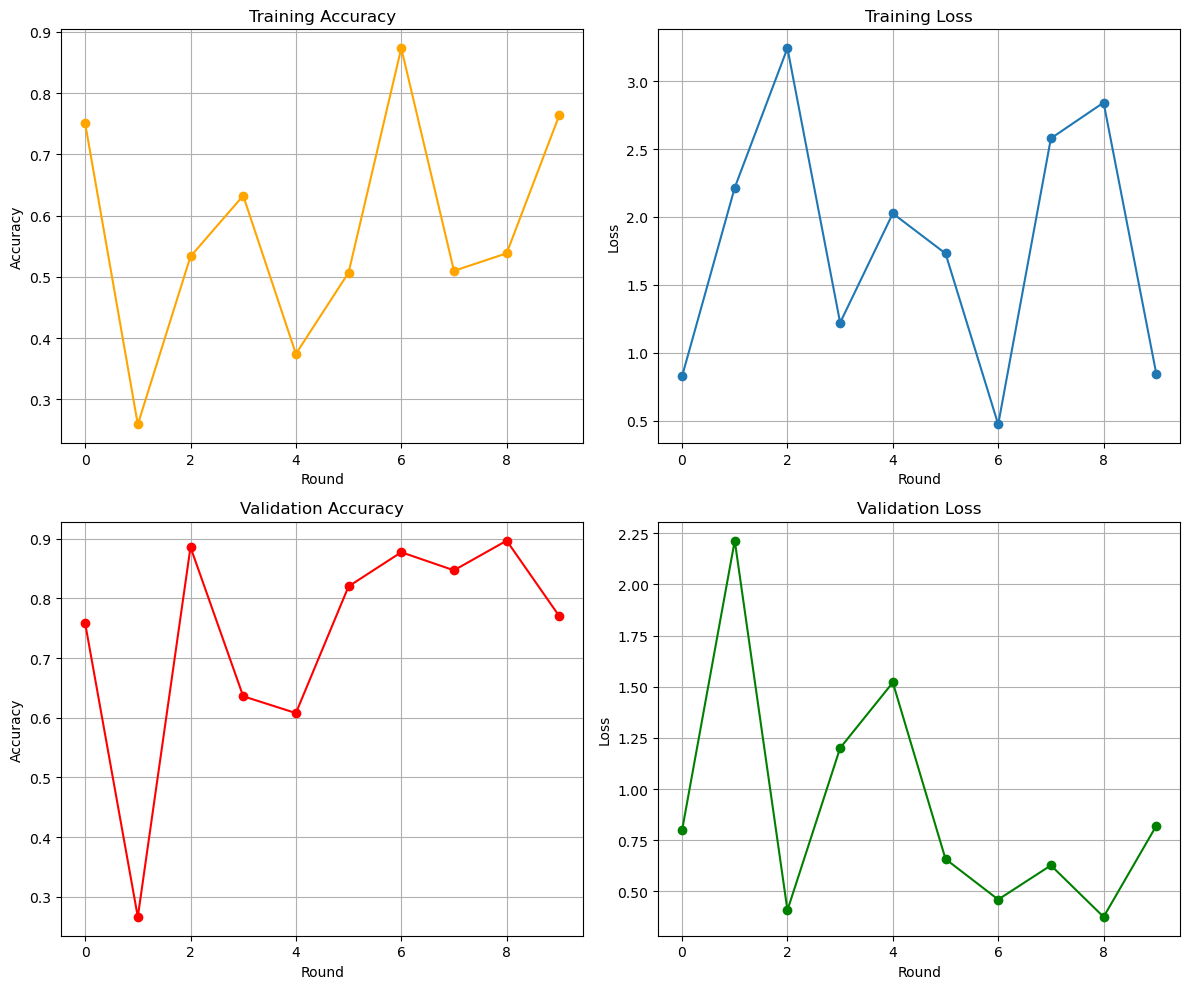

In [57]:
# Load the JSON file
file_path = '5_client_40.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extracting relevant data from each record
extracted_data = []
for record in data:
    client_name = record['sender']['name']
    correlation_id = record['correlationId']
    training_info = json.loads(record['data'])
    extracted_data.append({
        'client': client_name,
        'correlationId': correlation_id,
        'training_loss': training_info['training_loss'],
        'training_accuracy': training_info['training_accuracy'],
        'test_loss': training_info['test_loss'],
        'test_accuracy': training_info['test_accuracy']
    })

# Creating a DataFrame from the extracted data
df = pd.DataFrame(extracted_data)

# Drop client column
df = df.drop(['client'], axis=1)

# Group by correlationId and calculate mean
df = df.groupby('correlationId').mean()

# Resetting the index and call it round
df = df.reset_index()
df = df.rename(columns={'index': 'Round'})

# Drop correlationId column
df = df.drop(['correlationId'], axis=1)






# Plotting 2x2 plots for training loss, training accuracy, validation loss, and validation accuracy
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot training loss
axs[0, 1].plot(df.index, df['training_loss'], marker='o')
axs[0, 1].set_title('Training Loss')
axs[0, 1].set_xlabel('Round')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].grid()

# Plot training accuracy
axs[0, 0].plot(df.index, df['training_accuracy'], marker='o', color='orange')
axs[0, 0].set_title('Training Accuracy')
axs[0, 0].set_xlabel('Round')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid()

# Plot validation loss
axs[1, 1].plot(df.index, df['test_loss'], marker='o', color='green')
axs[1, 1].set_title('Validation Loss')
axs[1, 1].set_xlabel('Round')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].grid()

# Plot validation accuracy
axs[1, 0].plot(df.index, df['test_accuracy'], marker='o', color='red')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 0].set_xlabel('Round')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].grid()

plt.tight_layout()
plt.show()


In [47]:
df.head(5)

,training_loss,training_accuracy,test_loss,test_accuracy
0,0.826823,0.750933,0.798921,0.7587
1,2.215623,0.259300,2.213819,0.2664
2,3.242168,0.533383,0.408188,0.8859
3,1.221677,0.632667,1.200881,0.6361
4,2.025749,0.374433,1.520834,0.6079
